# Assignment on Statistics

## Student Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset *'Student_Performance.csv'* into Python

In [56]:
# Loading the dataset as dataframe 'sp'
sp = pd.read_csv('Students_Performance.csv')


In [57]:
 # Initial EDA
print(sp.info())
sp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**1.** Find out how many males and females participated in the test ?

In [58]:
sp['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

**Response:** *36* more female students participated in the test.

**2.** What do you think about the students' parental level of education?

In [59]:
# Filtering out parents' education level
sp['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

[Text(0, 0, 'some high school'),
 Text(1, 0, 'high school'),
 Text(2, 0, 'some college'),
 Text(3, 0, "associate's degree"),
 Text(4, 0, "bachelor's degree"),
 Text(5, 0, "master's degree")]

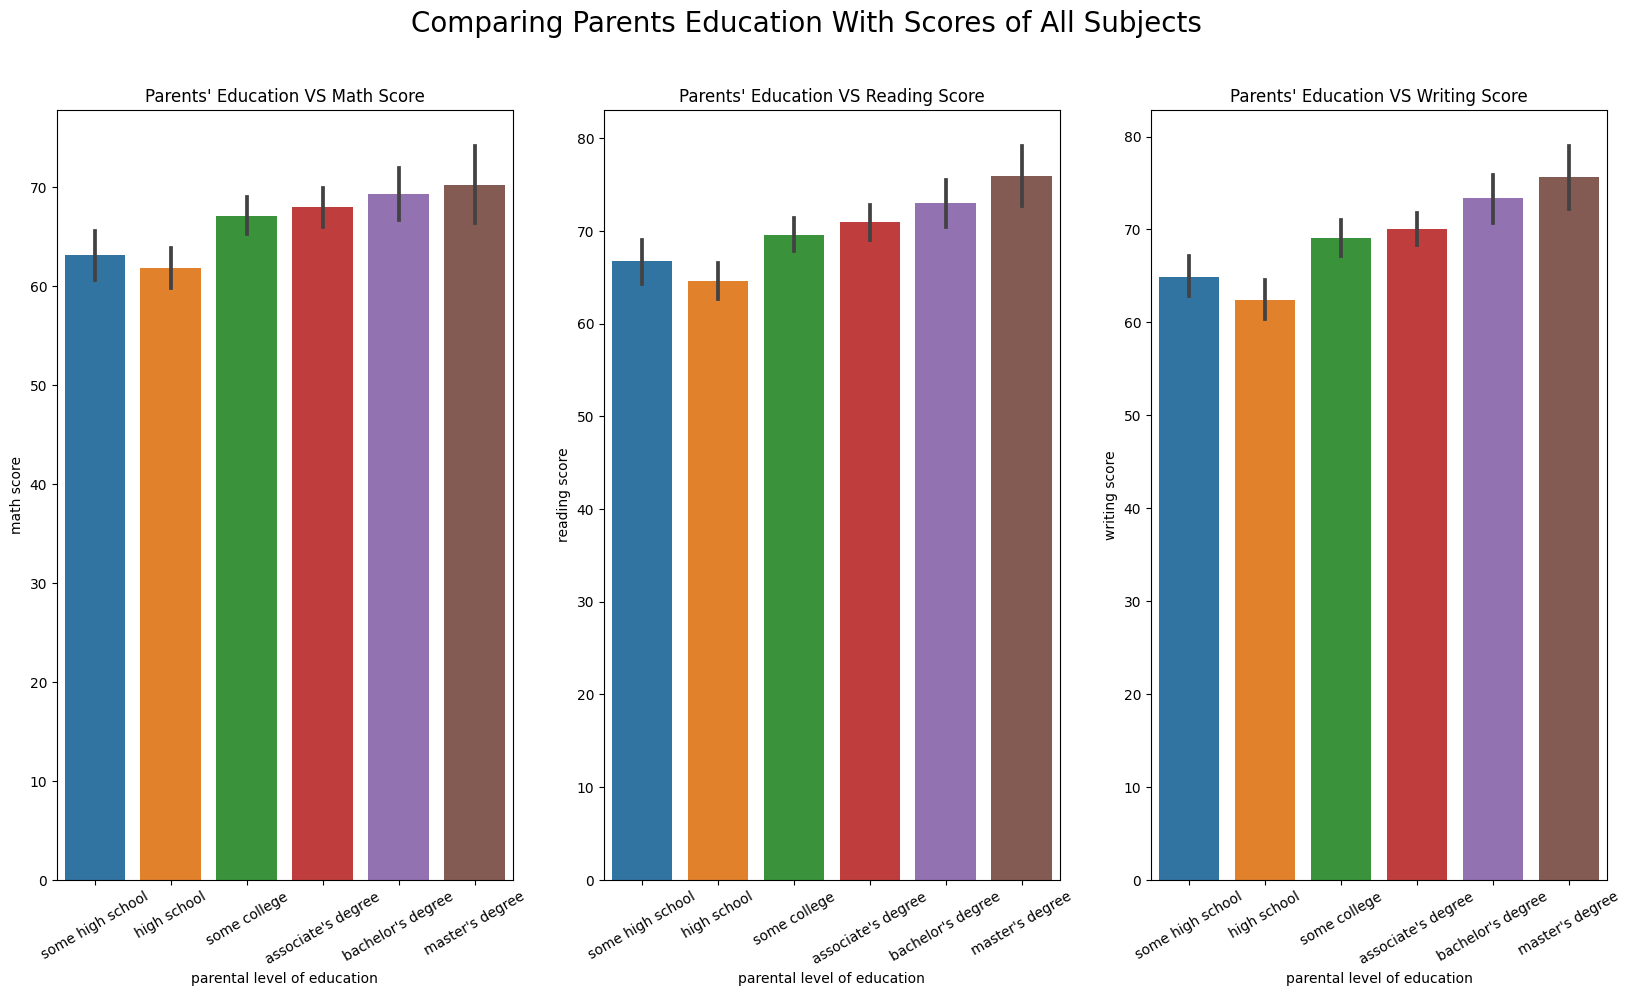

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Comparing Parents Education With Scores of All Subjects', fontsize=20)

sns.barplot(data=sp,x='parental level of education', y='math score', ax=ax1)
ax1.title.set_text('Parents\' Education VS Math Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=sp,x='parental level of education', y='reading score', ax=ax2)
ax2.title.set_text('Parents\' Education VS Reading Score')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=sp,x='parental level of education', y='writing score', ax=ax3)
ax3.title.set_text('Parents\' Education VS Writing Score')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)

**Response:** Students of parents with masters degree performed mostly well in all testes. And stundets of parents with high-school or some high-school performed least well. 

Overall, parents' education really affects students' performance in all of the tests.

**3.** Who scores the most on average for math, reading and writing based on  <br>
i) Gender  ii) Test Prepration Course ?

In [61]:
# Creating a new column for average of the three scores
sp['score average'] = (sp[['math score','reading score','writing score']]).mean(axis=1)
sp.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000


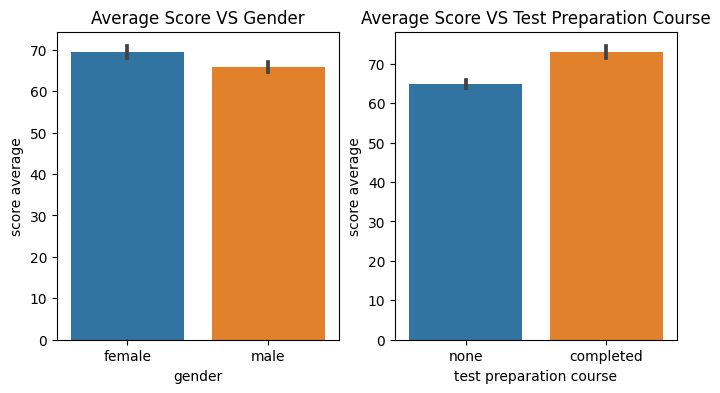

In [62]:
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(y=sp['score average'], x=sp['gender'], ax=ax4)
ax4.title.set_text('Average Score VS Gender')

sns.barplot(y=sp['score average'], x=sp['test preparation course'], ax=ax5)
ax5.title.set_text('Average Score VS Test Preparation Course')


**Response:** 
i) Average score against gender show us that female students performed well in all tests.

(ii) Average score againt test preparation course shows us that student who has completed the the course performed well in all of the tests.

**4.** What do you think about the scoring variation for math, reading and writing based on <br>
i) Gender ii) Test Prepration Course ?

In [63]:
# Creating a new column for varying score of the three scores
sp['score variation'] = sp[['math score','writing score','reading score']].std(axis=1)
sp.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,score variation
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000,8.544004
1,female,group B,high school,free/reduced,none,8,24,23,18.333333,8.962886
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000,7.211103


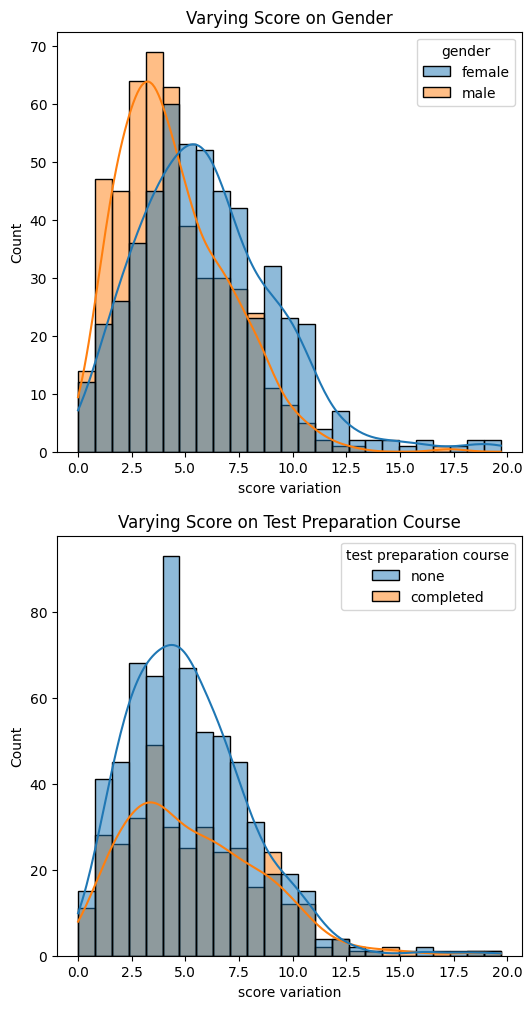

In [64]:
fig, (ax6, ax7) = plt.subplots(2, 1, figsize=(6, 12))

sns.histplot(x=sp['score variation'],hue=sp['gender'], kde=True, ax=ax6)
ax6.title.set_text('Varying Score on Gender')

sns.histplot(x=sp['score variation'],hue=sp['test preparation course'], kde=True, ax=ax7)
ax7.title.set_text('Varying Score on Test Preparation Course')

**Response:** i) On the case varying score on gender, which indicate that female students performed higher than mean on right side, while on the left side the male students scored mostly.

ii) On the case of varying score on test preparation course, as data indicate majority did not completed the course, yet performance is almost same, only a slight majority for the course completed students on the right side of the plot.

**5.** The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [65]:
# Find the percentile score using percetile 75 
cut_off_score = np.percentile(sp['math score'].values,75)

#Filter the data to select on eligible student for the bonus point
eligible_students = sp[sp['math score'] >= cut_off_score] 
eligible_students.sort_values('math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,score variation
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000,0.000000
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,4.041452
997,male,group D,some college,standard,completed,100,97,99,98.666667,1.527525
996,male,group A,some college,standard,completed,100,96,86,94.000000,7.211103
517,female,group E,associate's degree,standard,none,100,100,100,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,71.333333,4.932883
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333,4.932883
856,male,group E,some high school,standard,completed,77,76,77,76.666667,0.577350
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333,10.785793
